# THE SPARKS FOUNDATION INTERNSHIP - COVID19 ANALYSIS - TASK8

## DAHMANI SALAH EDDINE 



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

In [30]:
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [23]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.181440e+05,118140.000000,117126.000000,1.072430e+05,107396.000000,117126.000000,117523.000000,117519.000000,116510.000000,106635.000000,...,85975.000000,84729.000000,55528.000000,100302.000000,118454.000000,110428.000000,4494.000000,4494.000000,4494.000000,4494.000000
mean,1.493847e+06,6452.138954,6475.613395,3.753241e+04,144.099101,131.601949,18546.951857,84.486443,84.524860,384.740013,...,10.591334,32.743019,50.888570,3.030731,73.259355,0.726361,29717.778238,8.240681,15.502345,723.937534
std,9.970517e+06,39204.865607,38816.424677,2.234597e+05,785.911299,736.385836,31233.357470,195.963381,165.093897,643.993632,...,10.503942,13.508386,31.825163,2.456974,7.535282,0.150070,84270.522270,15.763349,31.220916,1111.831698
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.087000e+03,3.000000,9.571000,7.000000e+01,0.000000,0.000000,369.180000,0.292000,1.582000,10.790000,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-236.350000,-1.260000,-1.200000,-52.268601
50%,2.213200e+04,94.000000,116.857000,6.220000e+02,2.000000,1.714000,2894.707000,10.867000,15.086000,72.233000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,1789.450000,4.795000,6.075000,293.322962
75%,2.243105e+05,935.000000,987.857000,5.468000e+03,19.000000,15.857000,22888.606500,82.429500,92.114250,476.062500,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.848000,18552.800000,13.315000,21.617500,1254.375796
max,2.415735e+08,905955.000000,826438.429000,4.913600e+06,18006.000000,14703.143000,222333.434000,8620.690000,3385.473000,5993.151000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,746026.500000,106.830000,373.280000,6109.081949


# **Checking for count of all the unique values present for each attribute**

In [31]:
covid_data.nunique()

iso_code                                     233
continent                                      6
location                                     233
date                                         658
total_cases                                67811
                                           ...  
human_development_index                      154
excess_mortality_cumulative_absolute        4393
excess_mortality_cumulative                 2561
excess_mortality                            3122
excess_mortality_cumulative_per_million     4474
Length: 65, dtype: int64

# **Checking for count of NULL values for each column:**

In [32]:
covid_data.isnull().sum()

iso_code                                        0
continent                                    5659
location                                        0
date                                            0
total_cases                                  6745
                                            ...  
human_development_index                     14461
excess_mortality_cumulative_absolute       120395
excess_mortality_cumulative                120395
excess_mortality                           120395
excess_mortality_cumulative_per_million    120395
Length: 65, dtype: int64

# **Continents in terms of occurence of covid cases on basis of iso_codes**

In [33]:
covid_data.continent.value_counts()[0:10]

Africa           31567
Europe           29190
Asia             29153
North America    16097
South America     7304
Oceania           5919
Name: continent, dtype: int64

**Analysis of Covid Cases across Asia:**

# ***Collecting Asia Data from the given dataset***

In [37]:
asia_data = covid_data[covid_data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='2021-10-19']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
603,AFG,Asia,Afghanistan,2021-10-19,155801.0,25.0,28.857,7247.0,1.0,2.429,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5696,ARM,Asia,Armenia,2021-10-19,284237.0,1054.0,1482.429,5842.0,37.0,32.000,...,1.5,52.1,94.043,4.2,75.09,0.776,NaN,NaN,NaN,NaN
8372,AZE,Asia,Azerbaijan,2021-10-19,505554.0,2102.0,1641.000,6793.0,15.0,14.429,...,0.3,42.5,83.241,4.7,73.00,0.756,NaN,NaN,NaN,NaN
9559,BHR,Asia,Bahrain,2021-10-19,276262.0,74.0,65.571,1392.0,1.0,0.286,...,5.8,37.6,NaN,2.0,77.29,0.852,NaN,NaN,NaN,NaN
10155,BGD,Asia,Bangladesh,2021-10-19,1566296.0,469.0,399.286,27785.0,7.0,10.286,...,1.0,44.7,34.808,0.8,72.59,0.632,NaN,NaN,NaN,NaN


In [38]:
top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
52193,IND,Asia,India,2021-10-19,34108996.0,14623.0,15321.857,452651.0,197.0,208.857,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
52790,IDN,Asia,Indonesia,2021-10-19,4236287.0,903.0,924.857,143049.0,50.0,40.857,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
54020,IRN,Asia,Iran,2021-10-19,5809967.0,13308.0,11454.571,124423.0,167.0,191.714,...,0.8,21.1,NaN,1.50,76.68,0.783,NaN,NaN,NaN,NaN
115334,TUR,Asia,Turkey,2021-10-19,7714349.0,30862.0,29343.429,68060.0,223.0,207.857,...,14.1,41.1,NaN,2.81,77.69,0.820,NaN,NaN,NaN,NaN
90054,PHL,Asia,Philippines,2021-10-19,2731735.0,4449.0,6909.000,40972.0,211.0,153.714,...,7.8,40.8,78.463,1.00,71.23,0.718,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total deaths across asian countries')

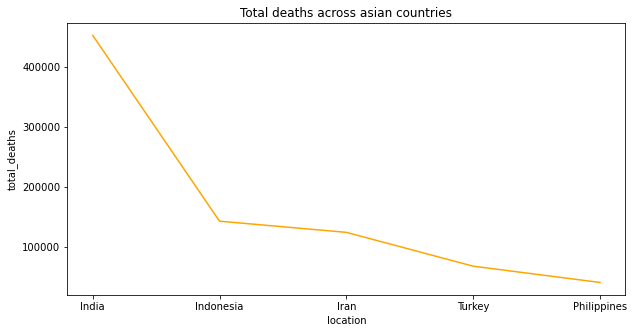

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_asia_deaths[0:5],color='orange')
plt.title("Total deaths across asian countries")

# ***Asian countries with least number of  total_cases being reported:***

In [40]:
least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24106,CHN,Asia,China,2021-10-19,96678.0,30.0,20.571,4636.0,0.0,0.000,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
123728,YEM,Asia,Yemen,2021-10-19,9575.0,19.0,23.286,1813.0,6.0,3.714,...,7.6,29.2,49.542,0.70,66.12,0.470,NaN,NaN,NaN,NaN
110323,TWN,Asia,Taiwan,2021-10-19,16343.0,6.0,4.857,846.0,0.0,0.000,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
50366,HKG,Asia,Hong Kong,2021-10-19,12301.0,2.0,4.143,213.0,0.0,0.000,...,NaN,NaN,NaN,NaN,84.86,0.949,NaN,NaN,NaN,NaN
110860,TJK,Asia,Tajikistan,2021-10-19,17484.0,0.0,0.000,125.0,0.0,0.000,...,NaN,NaN,72.704,4.80,71.10,0.668,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='location', ylabel='total_cases_per_million'>

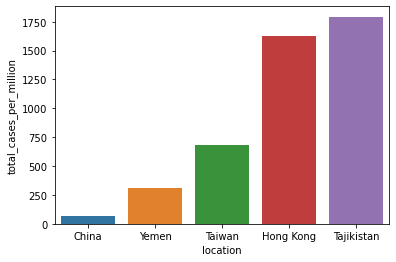

In [41]:
sns.barplot(x="location", y="total_cases_per_million", data=least_asia_cases.head())

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

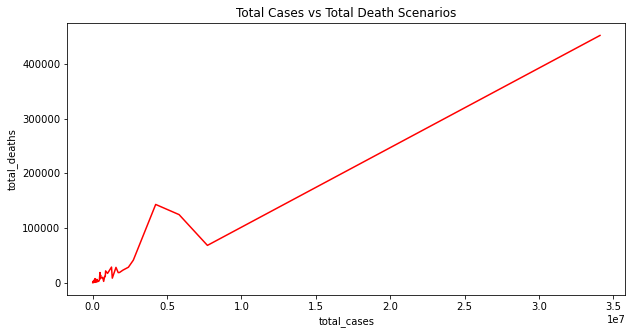

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="red")
plt.title("Total Cases vs Total Death Scenarios")

# **Conclusions:**
1. India is the one of the most affected Asian country as it has the highest number of deaths.
2. Laos has reported the least number of cases in Asia.

# ***Collecting Africa Data from the given dataset***

In [43]:
Africa_data = covid_data[covid_data['continent'] =='Africa']
Africa_data = Africa_data[Africa_data['date'] =='2021-10-19']
Africa_data = Africa_data[~Africa_data['location'].isin(['World','International'])]
Africa_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2424,DZA,Africa,Algeria,2021-10-19,205453.0,89.0,94.714,5875.0,2.0,2.286,...,0.7,30.4,83.741,1.9,76.88,0.748,NaN,NaN,NaN,NaN
3600,AGO,Africa,Angola,2021-10-19,63197.0,185.0,200.429,1678.0,8.0,5.143,...,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN
13120,BEN,Africa,Benin,2021-10-19,24560.0,0.0,32.143,161.0,0.0,0.286,...,0.6,12.3,11.035,0.5,61.77,0.545,NaN,NaN,NaN,NaN
15889,BWA,Africa,Botswana,2021-10-19,184051.0,0.0,400.000,2389.0,0.0,1.143,...,5.7,34.4,NaN,1.8,69.59,0.735,NaN,NaN,NaN,NaN
18402,BFA,Africa,Burkina Faso,2021-10-19,14759.0,7.0,30.429,209.0,6.0,1.286,...,1.6,23.9,11.877,0.4,61.58,0.452,NaN,NaN,NaN,NaN


In [44]:
top_10_Africa_deaths  = Africa_data.sort_values("total_deaths", ascending = False)
top_10_Africa_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
103635,ZAF,Africa,South Africa,2021-10-19,2917255.0,452.0,616.714,88674.0,55.0,35.000,...,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
114746,TUN,Africa,Tunisia,2021-10-19,711007.0,54.0,130.143,25103.0,3.0,8.143,...,1.1,65.8,78.687,2.30,76.70,0.740,NaN,NaN,NaN,NaN
33922,EGY,Africa,Egypt,2021-10-19,320207.0,868.0,870.143,18058.0,43.0,41.857,...,0.2,50.1,89.827,1.60,71.99,0.707,NaN,NaN,NaN,NaN
76639,MAR,Africa,Morocco,2021-10-19,942779.0,499.0,408.143,14566.0,5.0,11.571,...,0.8,47.1,NaN,1.10,76.68,0.686,NaN,NaN,NaN,NaN
37460,ETH,Africa,Ethiopia,2021-10-19,359881.0,386.0,576.857,6258.0,20.0,27.429,...,0.4,8.5,7.960,0.30,66.60,0.485,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total deaths across Africain countries')

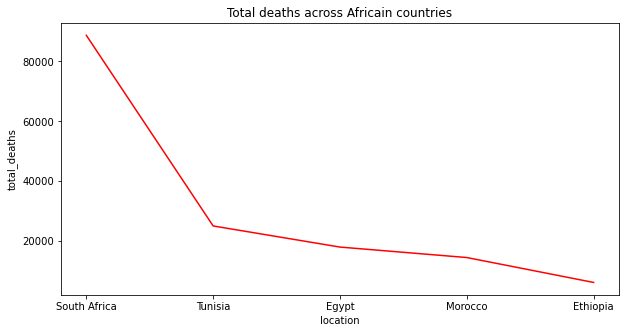

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_Africa_deaths[0:5],color='red')
plt.title("Total deaths across Africain countries")

In [47]:
least_Africa_cases = Africa_data.sort_values("total_cases_per_million",ascending =True)
least_Africa_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
81772,NER,Africa,Niger,2021-10-19,6193.0,16.0,10.143,205.0,0.0,0.143,...,0.1,15.4,8.978,0.3,62.42,0.394,NaN,NaN,NaN,NaN
22864,TCD,Africa,Chad,2021-10-19,5069.0,0.0,1.143,174.0,0.0,0.000,...,NaN,NaN,5.818,NaN,54.24,0.398,NaN,NaN,NaN,NaN
111443,TZA,Africa,Tanzania,2021-10-19,26034.0,0.0,0.000,724.0,0.0,0.000,...,3.3,26.7,47.953,0.7,65.46,0.529,NaN,NaN,NaN,NaN
30328,COD,Africa,Democratic Republic of Congo,2021-10-19,57338.0,0.0,13.000,1091.0,0.0,0.571,...,NaN,NaN,4.472,NaN,60.68,0.480,NaN,NaN,NaN,NaN
18402,BFA,Africa,Burkina Faso,2021-10-19,14759.0,7.0,30.429,209.0,6.0,1.286,...,1.6,23.9,11.877,0.4,61.58,0.452,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='location', ylabel='total_cases_per_million'>

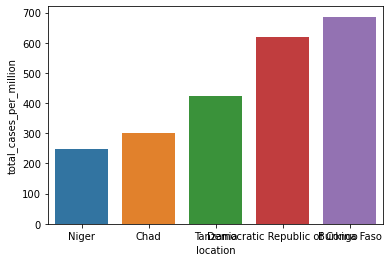

In [48]:
sns.barplot(x="location", y="total_cases_per_million", data=least_Africa_cases.head())

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

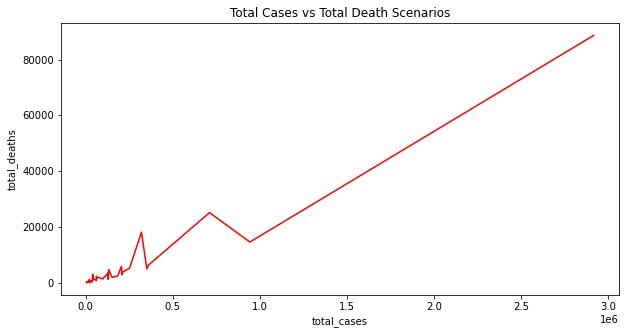

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=Africa_data,color="red")
plt.title("Total Cases vs Total Death Scenarios")